<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-11/11_CNN_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Lecture 11 - CNN - CIFAR-10

---

*   Sulthan Nauval Abdillah
*   1103213065
*   Link ChatGPT : [link text](https://chatgpt.com/share/782ffdb7-24ab-484c-b580-6b8c322f56b8)

## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


## Pre-Processing

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Training Model

In [5]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5264 - accuracy: 0.4455 - val_loss: 1.2218 - val_accuracy: 0.5626
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1521 - accuracy: 0.5936 - val_loss: 1.0400 - val_accuracy: 0.6299
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0000 - accuracy: 0.6482 - val_loss: 1.0227 - val_accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9032 - accuracy: 0.6849 - val_loss: 0.9559 - val_accuracy: 0.6621
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8265 - accuracy: 0.7091 - val_loss: 0.9339 - val_accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7690 - accuracy: 0.7302 - val_loss: 0.8628 - val_accuracy: 0.7061
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7199 - accuracy: 0.7478 - val_loss: 0.8130 - val_accuracy

## Evaluate Model

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.8812 - accuracy: 0.7069 - 658ms/epoch - 2ms/step

Test accuracy: 0.7069000005722046


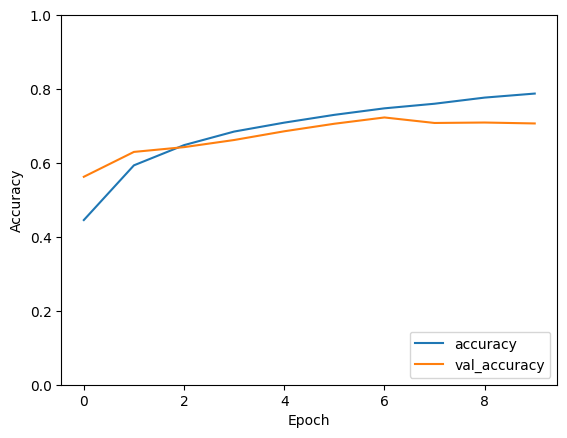

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()